In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

In [6]:
train = pd.read_csv('train.csv', nrows=18500000)

In [7]:
test = pd.read_csv('test.csv')
dest = pd.read_csv('destinations.csv')

In [8]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18500000 entries, 0 to 18499999
Data columns (total 24 columns):
date_time                    object
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
is_booking                   int64
cnt                          int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
hotel_cluster                int64
dtypes: float64(1), int64(20), object(3)

In [10]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528243 entries, 0 to 2528242
Data columns (total 22 columns):
id                           int64
date_time                    object
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
dtypes: float64(1), int64(18), object(3)
memory usage: 424.4+ MB


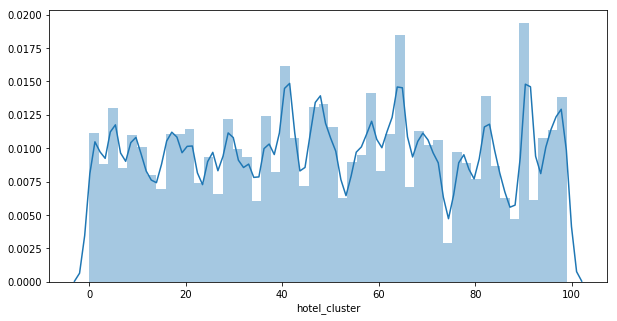

In [12]:
sns.distplot(train['hotel_cluster'])

In [62]:
import random
unique_users = set(train.user_id.unique())
rand_user_id = random.sample(unique_users,1000000)

ValueError: Sample larger than population or is negative

In [ ]:
sample_train = pd.DataFrame()
train_chunk = pd.read_csv('train.csv', iterator = True, chunksize = 1000000)
for chunk in train_chunk:
    sample_train = sample_train.append(chunk.loc[chunk['user_id'].isin(rand_user_id)])

In [63]:
sample_train['user_id'].nunique()

100000

In [64]:
sample_train['date_time'] = pd.to_datetime(sample_train['date_time'])
sample_train['year'] = sample_train['date_time'].dt.year
sample_train['month'] = sample_train['date_time'].dt.month

In [65]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132820 entries, 6 to 18499546
Data columns (total 26 columns):
date_time                    datetime64[ns]
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
is_booking                   int64
cnt                          int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
hotel_cluster                int64
year                         int6

In [66]:
sample_train.groupby(['year'])['month'].value_counts()

year  month
2013  7         91477
      3         84282
      6         84095
      8         83544
      10        82229
      5         81546
      9         79722
      4         77583
      2         69025
      12        67911
      11        67183
      1         64172
2014  12       244657
      8        230825
      7        230696
      9        226733
      10       224668
      11       216641
      6        184052
      5        156423
      4        146113
      3        146002
      1         97153
      2         96088
Name: month, dtype: int64

In [67]:
train_sub = sample_train[((sample_train.year == 2013) | ((sample_train.year == 2014) & (sample_train.month < 8)))]
test_sub = sample_train[((sample_train.year == 2014) & (sample_train.month >= 8))]

In [68]:
test_sub = test_sub[test_sub.is_booking == 1]

In [69]:
most_common_clusters = list(train.hotel_cluster.value_counts().head().index)
print(most_common_clusters)

[91, 41, 48, 64, 65]


In [70]:
predictions = [most_common_clusters for i in range(test_sub.shape[0])]

In [71]:
import ml_metrics as metrics
target = [[l] for l in test_sub['hotel_cluster']]
metrics.mapk(target, predictions, k=5)

0.06517869267329177

In [72]:
train.corr()['hotel_cluster']

site_name                   -0.021965
posa_continent               0.014717
user_location_country       -0.010650
user_location_region         0.007464
user_location_city           0.001190
orig_destination_distance    0.007302
user_id                      0.000928
is_mobile                    0.008706
is_package                   0.039519
channel                      0.000547
srch_adults_cnt              0.012399
srch_children_cnt            0.016330
srch_rm_cnt                 -0.005820
srch_destination_id         -0.011258
srch_destination_type_id    -0.032694
is_booking                  -0.021970
cnt                          0.003112
hotel_continent             -0.013892
hotel_country               -0.023953
hotel_market                 0.034220
hotel_cluster                1.000000
Name: hotel_cluster, dtype: float64

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
dest_small = pca.fit_transform(dest[["d{0}".format(i + 1) for i in range(149)]])
dest_small = pd.DataFrame(dest_small)
dest_small["srch_destination_id"] = dest["srch_destination_id"]

In [74]:
dest_small.head()

,0,1,2,srch_destination_id
0,-0.044268,0.169419,0.032527,0
1,-0.440761,0.077405,-0.091572,1
2,0.001033,0.020677,0.012107,2
3,-0.480467,-0.040345,-0.019319,3
4,-0.207253,-0.042694,-0.011743,4


In [75]:
def calc_fast_features(df):
    df["date_time"] = pd.to_datetime(df["date_time"])
    df["srch_ci"] = pd.to_datetime(df["srch_ci"], format='%Y-%m-%d', errors="coerce")
    df["srch_co"] = pd.to_datetime(df["srch_co"], format='%Y-%m-%d', errors="coerce")
    
    props = {}
    for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
        props[prop] = getattr(df["date_time"].dt, prop)
    
    carryover = [p for p in df.columns if p not in ["date_time", "srch_ci", "srch_co"]]
    for prop in carryover:
        props[prop] = df[prop]
    
    date_props = ["month", "day", "dayofweek", "quarter"]
    for prop in date_props:
        props["ci_{0}".format(prop)] = getattr(df["srch_ci"].dt, prop)
        props["co_{0}".format(prop)] = getattr(df["srch_co"].dt, prop)
    props["stay_span"] = (df["srch_co"] - df["srch_ci"]).astype('timedelta64[h]')
        
    ret = pd.DataFrame(props)
    
    ret = ret.join(dest_small, on="srch_destination_id", how='left', rsuffix="dest")
    ret = ret.drop("srch_destination_iddest", axis=1)
    return ret

df = calc_fast_features(train_sub)
df.fillna(-1, inplace=True)

In [76]:
df.head()

,month,day,hour,minute,dayofweek,quarter,site_name,posa_continent,user_location_country,user_location_region,...,ci_day,co_day,ci_dayofweek,co_dayofweek,ci_quarter,co_quarter,stay_span,0,1,2
6,7,16,9,42,2,3,2,3,66,189,...,1.0,2.0,4.0,5.0,3.0,3.0,24.0,-0.532439,-0.031186,-0.030729
7,7,16,9,45,2,3,2,3,66,189,...,1.0,2.0,4.0,5.0,3.0,3.0,24.0,-0.532439,-0.031186,-0.030729
8,7,16,9,52,2,3,2,3,66,189,...,1.0,2.0,4.0,5.0,3.0,3.0,24.0,-0.532439,-0.031186,-0.030729
9,7,16,9,55,2,3,2,3,66,189,...,1.0,2.0,4.0,5.0,3.0,3.0,24.0,-0.532439,-0.031186,-0.030729
10,7,16,10,0,2,3,2,3,66,189,...,1.0,2.0,4.0,5.0,3.0,3.0,24.0,-0.532439,-0.031186,-0.030729


In [77]:
def make_key(items):
    return "_".join([str(i) for i in items])

match_cols = ["srch_destination_id"]
cluster_cols = match_cols + ['hotel_cluster']
groups = train_sub.groupby(cluster_cols)
top_clusters = {}
for name, group in groups:
    clicks = len(group.is_booking[group.is_booking == False])
    bookings = len(group.is_booking[group.is_booking == True])
    
    score = bookings + .15 * clicks
    
    clus_name = make_key(name[:len(match_cols)])
    if clus_name not in top_clusters:
        top_clusters[clus_name] = {}
    top_clusters[clus_name][name[-1]] = score

In [78]:
import operator

cluster_dict = {}
for n in top_clusters:
    tc = top_clusters[n]
    top = [l[0] for l in sorted(tc.items(), key=operator.itemgetter(1), reverse=True)[:5]]
    cluster_dict[n] = top

In [79]:
preds = []
for index, row in test_sub.iterrows():
    key = make_key([row[m] for m in match_cols])
    if key in cluster_dict:
        preds.append(cluster_dict[key])
    else:
        preds.append([])

In [80]:
preds[0:5]

[[56, 70, 98, 41, 55],
 [1, 45, 79, 24, 88],
 [68, 9, 91, 28, 59],
 [65, 96, 73, 87, 8],
 [82, 5, 90, 2, 13]]

In [81]:
metrics.mapk([[l] for l in test_sub["hotel_cluster"]], preds, k=5)

0.2898769623274284

In [82]:
match_cols = ['user_location_country', 'user_location_region', 'user_location_city', 'hotel_market', 'orig_destination_distance']

groups = train_sub.groupby(match_cols)
    
def generate_exact_matches(row, match_cols):
    index = tuple([row[t] for t in match_cols])
    try:
        group = groups.get_group(index)
    except Exception:
        return []
    clus = list(set(group.hotel_cluster))
    return clus

exact_matches = []
for i in range(test_sub.shape[0]):
    exact_matches.append(generate_exact_matches(test_sub.iloc[i], match_cols))

In [83]:
def f5(seq, idfun=None): 
    if idfun is None:
        def idfun(x): return x
    seen = {}
    result = []
    for item in seq:
        marker = idfun(item)
        if marker in seen: continue
        seen[marker] = 1
        result.append(item)
    return result
    
full_preds = [f5(exact_matches[p] + preds[p] + most_common_clusters)[:5] for p in range(len(preds))]
metrics.mapk([[l] for l in test_sub["hotel_cluster"]], full_preds, k=5)

0.3711172149867292